# Experiments and tests

In [1]:
import GeneticPGCSOptimizer as go
from communication_grid import Grid
import matplotlib.pyplot as plt
from utils import *

source_corpus = ["training_corpora/adrien1_bia.txt","training_corpora/adrien2_bia.txt",
                 "training_corpora/adrien3_bia.txt"]
training_corpus = ["training_corpora/adrien1_bia.txt","training_corpora/adrien2_bia.txt",
                 "training_corpora/adrien3_bia.txt"]

if __name__ == '__main__':
    optimizer = go.GeneticPGCSOptimizer(source_corpus,training_corpus,pop_size = 250, select_number = 40,
                                           gen_number = 500, randomizer = True, distance_formula = "euclidean",
                                           cost_average = False,nb_proc = 6)

    optimal_grid,cost = optimizer.genetic_pgcs_optimization()

####### Genetic Pictogram Grid Communication Optimizer #######

## Optimizer Parameters ##
------------------------------------------------------------------------
Source files : ['training_corpora/adrien1_bia.txt', 'training_corpora/adrien2_bia.txt', 'training_corpora/adrien3_bia.txt']     Training file : ['training_corpora/adrien1_bia.txt', 'training_corpora/adrien2_bia.txt', 'training_corpora/adrien3_bia.txt']
------------------------------------------------------------------------
  INITIAL POPULATION SIZE : 250

  NUMBER OF GENERATION : 500

  CROSSOVER RATE : 50.0%     MUTATION RATE : 50.0%

  CROSSOVER INFORMATION RATE : 50.0%

  DISTANCE FORMULA (COST) : EUCLIDEAN
------------------------------------------------------------------------
  NUMBER OF PROCESSES : 6
------------------------------------------------------------------------



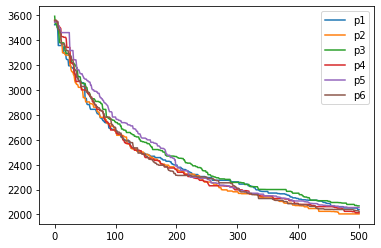

In [2]:
#Display the grid in one image (stored as "default.png")
optimal_grid.display()
optimal_grid.to_csv()

#Plot the history
histos = optimizer.fitness_history("only_best")

i = 1
for hist in histos:
    plt.plot(hist,label = "p"+str(i))
    i = i + 1

plt.legend()
plt.show()